# Trabalho 2

## 4.1.5 Matriz de correlação

Neste notebook está apenas a matriz de correlação.

### Imports

In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import utilidades as ut

### Inicializações e variáveis

In [2]:
warnings.filterwarnings("ignore")  # Desabilitar warnings.
plt.style.use(
    "style/estilo.mplstyle")  # Garantir que se utiliza um estilo definido centralmente e comum a todos os gráficos.
%matplotlib inline

label_encoder = LabelEncoder()

ficheiro = "dados_preparados.csv"
colunas_numericas = ["Idade", "FCV", "NRP", "CA", "FAF", "TUDE", "IMC"]
colunas_classes = ["Genero", "Historico_obesidade_familiar", "FCCAC", "Fumador", "MCC", "CCER", "CBA", "TRANS"]

## Leitura dos dados preparados

In [3]:
dados_trabalho = pd.read_csv(ficheiro)

In [4]:
dados_trabalho

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,Feminino,21.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,1.000000,Nao,Transportes_Publicos,Peso_Normal,24.386526
1,Feminino,21.000000,Sim,Nao,3.0,3.0,Ocasionalmente,Sim,3.000000,Sim,3.000000,0.000000,Ocasionalmente,Transportes_Publicos,Peso_Normal,24.238227
2,Masculino,23.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,1.000000,Frequentemente,Transportes_Publicos,Peso_Normal,23.765432
3,Masculino,27.000000,Nao,Nao,3.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,0.000000,Frequentemente,Caminhada,Excesso_Peso_Grau_I,26.851852
4,Masculino,22.000000,Nao,Nao,2.0,1.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,0.000000,Ocasionalmente,Transportes_Publicos,Excesso_Peso_Grau_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Feminino,20.976842,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,1.728139,Nao,1.676269,0.906247,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.901475
2107,Feminino,21.982942,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.005130,Nao,1.341390,0.599270,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.741923
2108,Feminino,22.524036,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.054193,Nao,1.414209,0.646288,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.543817
2109,Feminino,24.361936,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.852339,Nao,1.139107,0.586035,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.071535


Para esta matriz vamos utilizar os dados previamente preparados.

Temos no entanto de realizar primeiro o encoding das classes para valores numéricos, esta operação é realizada usando o ``sklearn.preprocessing.LabelEncoder`` em todas as colunas.

In [5]:
ut.titulo("Valores codificados por atributo")

for coluna in dados_trabalho.columns:
    if dados_trabalho[coluna].dtype == 'object':
        dados_trabalho[coluna] = label_encoder.fit_transform(dados_trabalho[coluna].values)
        ut.etiqueta_e_valor(coluna, str(sorted(dados_trabalho[coluna].unique())))

Valores codificados por atributo
Genero: [0, 1]
Historico_obesidade_familiar: [0, 1]
FCCAC: [0, 1]
CCER: [0, 1, 2, 3]
Fumador: [0, 1]
MCC: [0, 1]
CBA: [0, 1, 2, 3]
TRANS: [0, 1, 2, 3, 4]
Label: [0, 1, 2, 3, 4, 5, 6, 7, 8]


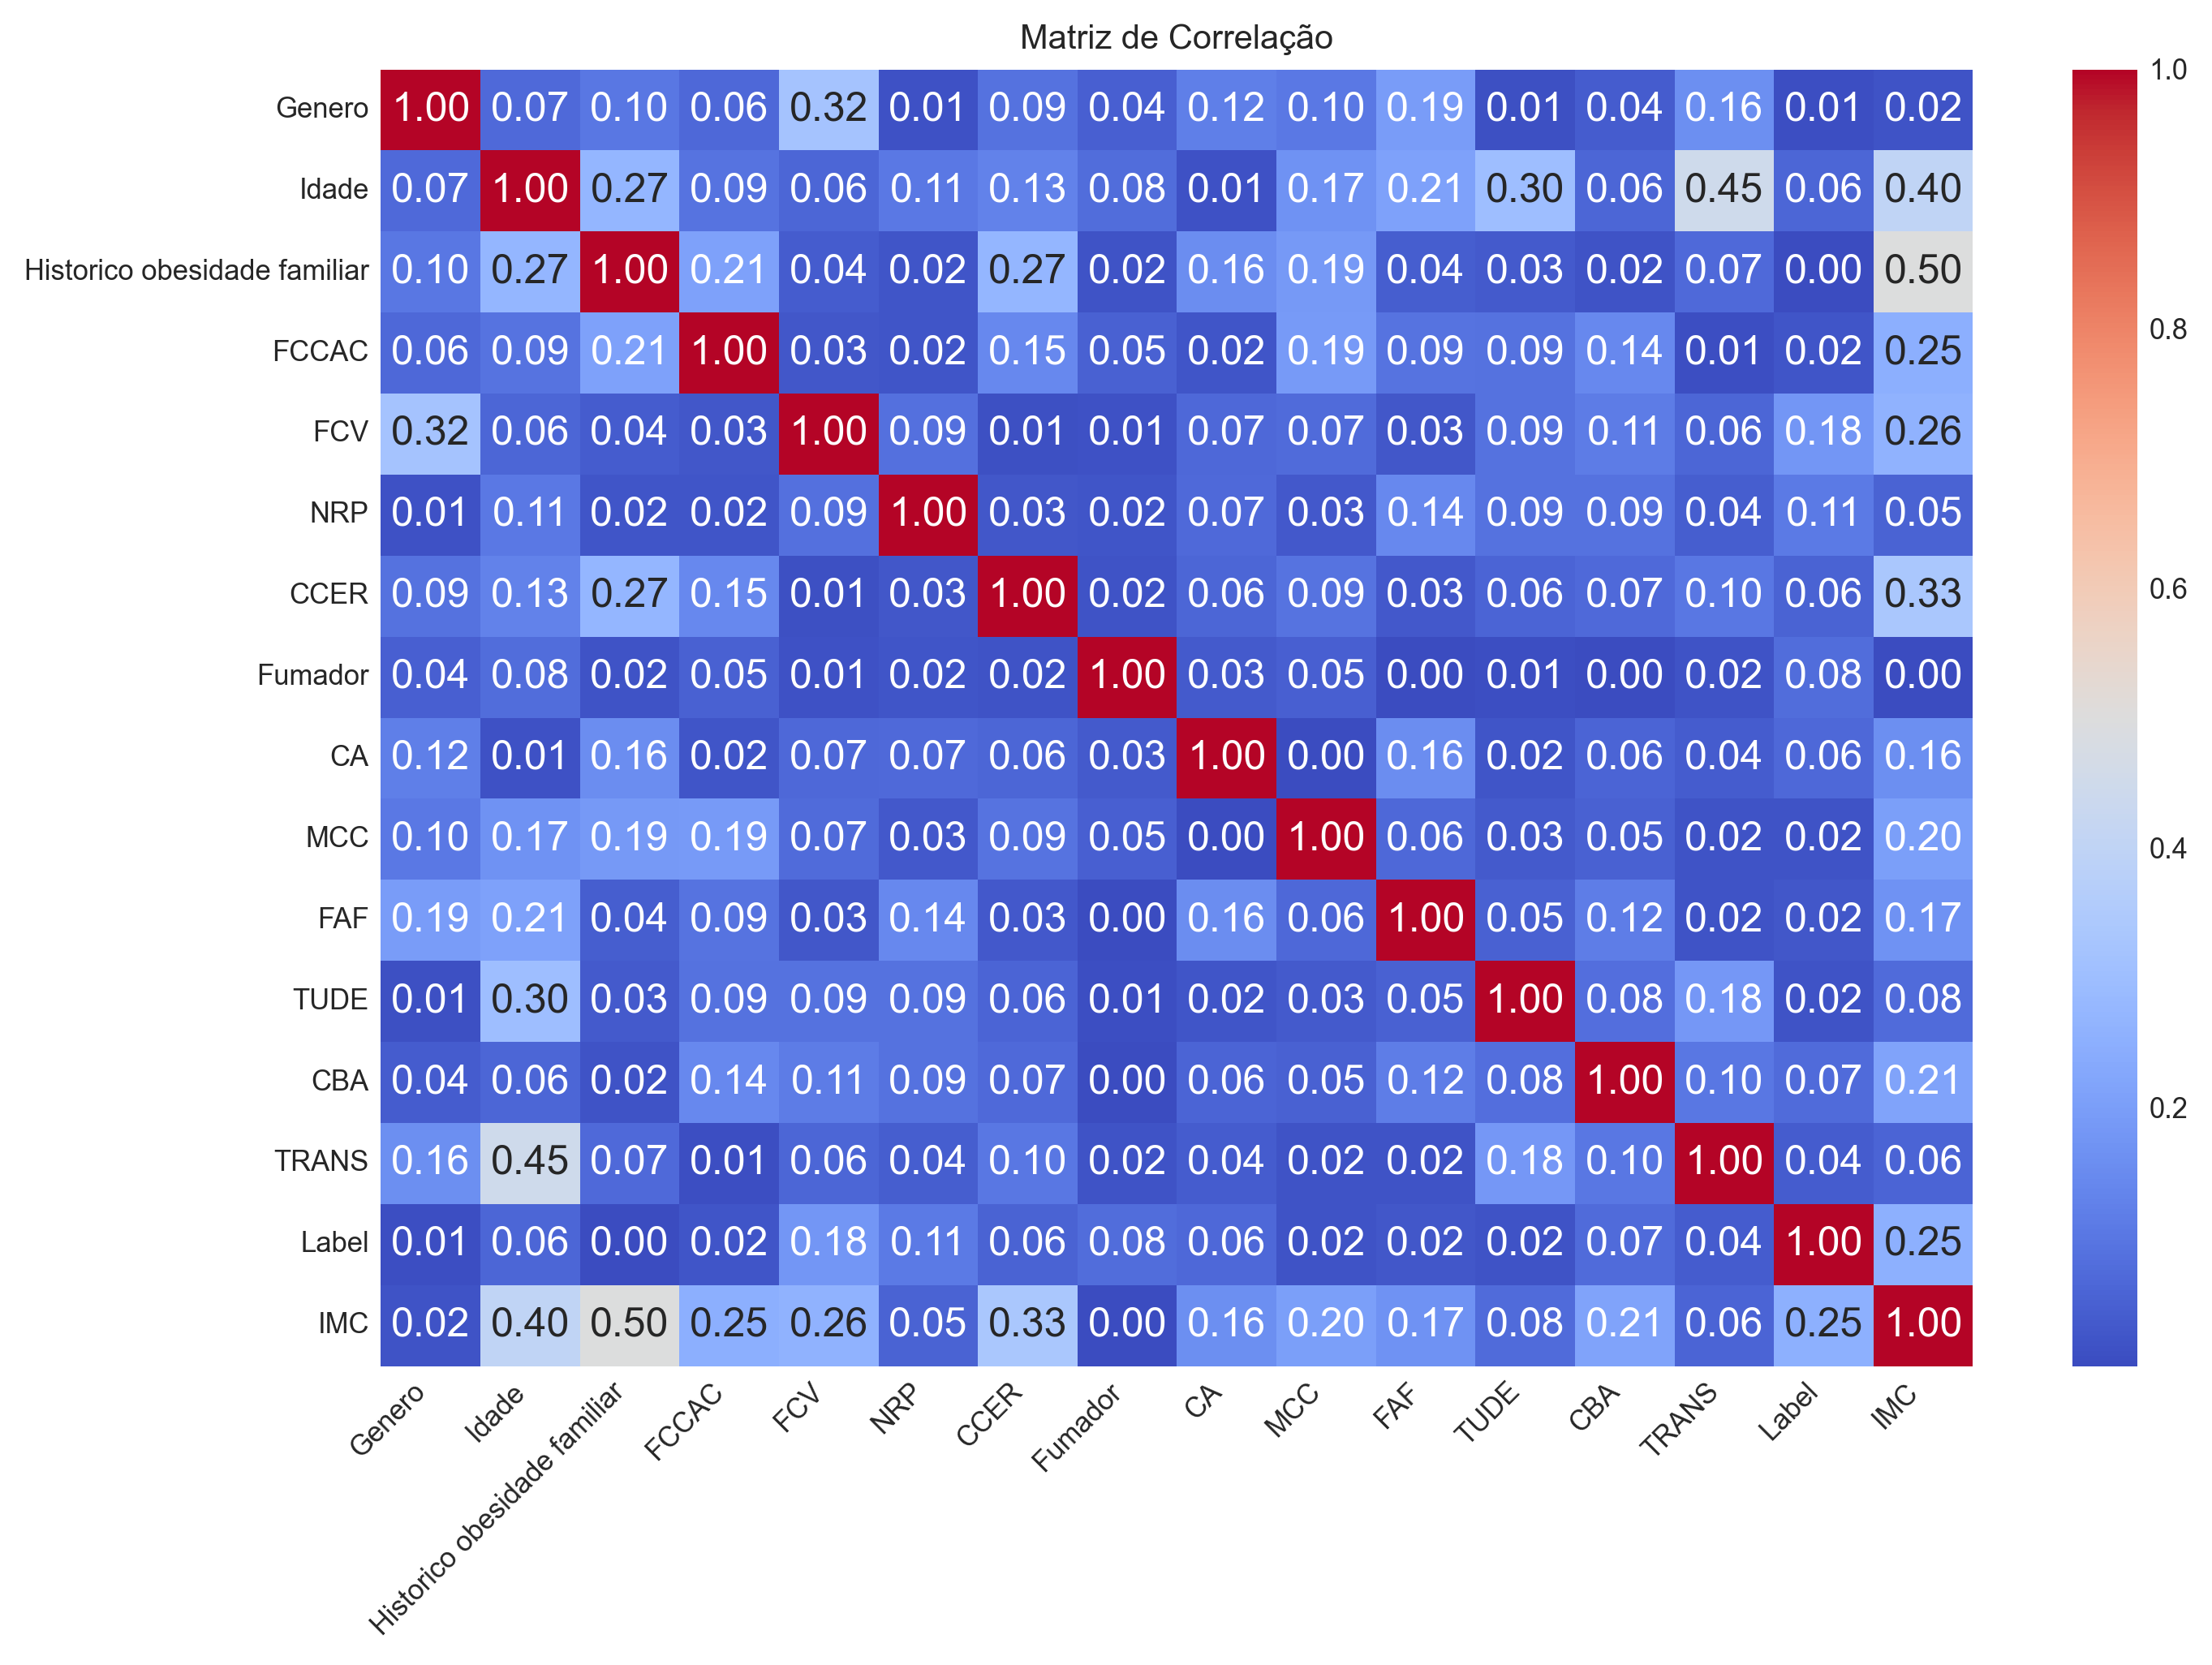

In [11]:
fig_corr = plt.figure(figsize=(10, 7))
etiquetas_corr = [ut.undersplit(texto) for texto in dados_trabalho.columns]

sns.heatmap(dados_trabalho.corr(method="spearman").abs(), cmap='coolwarm', annot=True, fmt='.2f', mask=False)

plt.xticks(ticks=[i + 0.5 for i in range(len(dados_trabalho.columns))], labels=etiquetas_corr, rotation=45, ha='right')
plt.yticks(ticks=[i + 0.5 for i in range(len(dados_trabalho.columns))], labels=etiquetas_corr)
plt.title('Matriz de Correlação')
plt.tight_layout()

# plt.show()

Por este diagrama podemos ver que não existe uma forte correlação entre nenhum dos atributos.